# Домашнее задание к лекции «Случайные события. Случайные величины»

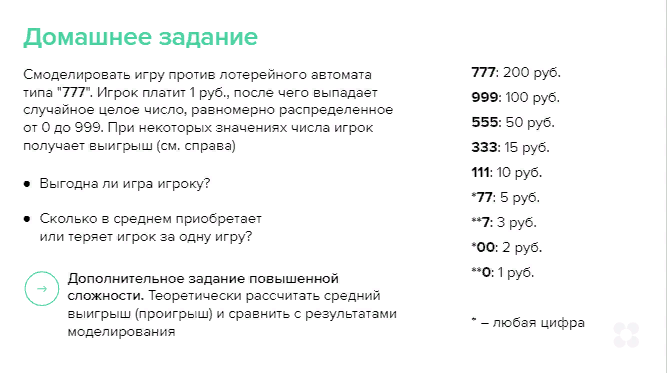

In [19]:
import numpy as np

trials = 1000      # соличество попыток
cost = 1           # стоимость одной игры
total_win = 0      # общий итоговый выигрыш


for i in range(trials):
    win=0                                # перед кажой попыткой обнуляем выигрыш этой попытки
    number = np.random.randint(0, 1000)  # генерируем число и, в зависимости от его значения, изменяем значение выигрыша попытки
    if number == 777:
        win = 200
    elif number == 999:
        win = 100
    elif number == 555:
        win = 50
    elif number == 333:
        win = 15
    elif number == 111:
        win = 10
    elif number % 100 == 77:
        win = 5
    elif number % 10 == 7:
        win = 3
    elif number % 100 == 0:
        win = 2
    elif number % 10 == 0:
        win = 1   
    total_win +=win                   # выигрыш от каждой попытки прибавляем к общему выигрышу

print(f'Игрок сделал {trials} попыток, заплатил {trials*cost} рублей, выиграл {total_win} рублей.')
if total_win >= trials*cost:
    print(f'Игра была выгодна игроку. Выигрыш составил {total_win/(trials*cost)*100:.2f}% от потраченной суммы')
else:
    print(f'Игра была не выгодна игроку. Выигрыш составил {total_win/(trials*cost)*100:.2f}% от потраченной суммы')


Игрок сделал 1000 попыток, заплатил 1000 рублей, выиграл 1086 рублей.
Игра была выгодна игроку. Выигрыш составил 108.60% от потраченной суммы


По моим наблюдениям при количестве попыток порядка 1000 еще встречаются случаи, когда игрок может остаться в выигрыше.
При количестве попыток порядка 10000 и более ни разу не наблюдал, чтобы игрок был в выигрыше. Чем больше количество попыток, тем ближе выигрыш стремится к 80% от потраченной суммы.

## Теоретический расчет среднего выигрыша:

In [24]:
import pandas as pd
game = pd.read_excel('777.xlsx')
game

,Событие,Выигрыш,Количество исходов,Вероятность
0,777,200,1 из 1000,0.001
1,999,100,1 из 1000,0.001
2,555,50,1 из 1000,0.001
3,333,15,1 из 1000,0.001
4,111,10,1 из 1000,0.001
5,*77,5,9 из 1000,0.009
6,**7,3,90 из 1000,0.090
7,*00,2,10 из 1000,0.010
8,**0,1,90 из 1000,0.090


In [32]:
# Всего возможно 204 исхода из 1000, при которых игрок хоть что-то выигрывает (не теряет свои деньги). т.е. вероятность 
# наступления события, когда игрок не проиграет составляет 0,204 (20,4%).
# Средний выигрыш будем рассчитывать как сумму произведений каждого возможного выигрыша и его вероятности
win_teor = 0
for i in range(9):
    win_teor += game['Выигрыш'][i]*game['Вероятность'][i]

print(f'Теоретический средний выигрыш равен {win_teor:.2f}')


Теоретический средний выигрыш равен 0.80


т.е. получается, что в среднем при стоимости игры 1 рубль игрок выигрывает 0,8 рубля  - обратно получает лишь 80% потраченной суммы